## Data Analysis for Round 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('./../')  # Add the parent directory to Python path
from plot_utils_CY import *

### Outline
1. Data Loading: Load your trading data into a Pandas DataFrame. This could be in the form of a CSV file, a database query result, or any other structured data format.
1. Data Cleaning: Clean the data by handling missing values, removing duplicates, and converting data types if necessary.
1. Data Manipulation: Perform data manipulation tasks such as calculating returns, creating new features, or aggregating data.
1. Data Analysis: Analyze the trading data using statistical methods and visualizations.
1. Performance Metrics: Calculate performance metrics such as Sharpe Ratio, Maximum Drawdown, and Win Rate.
1. Visualization: Visualize performance metrics and other relevant information using Matplotlib or other plotting libraries.

### Data Loading
* Loading price data and trade data into dataframes
* Merging data of the same format from different days

In [40]:
path = './../../shared_data/round1/'
days = [-2, -1, 0]

prices = [pd.read_csv(path + f'prices_round_1_day_{d}.csv', sep=';') for d in days]
price = pd.concat(prices)
price

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [41]:
trades = [pd.read_csv(path + f'trades_round_1_day_{d}_nn.csv', sep=';', ).assign(day=d) for d in days]
trade = pd.concat(trades)
trade

,timestamp,buyer,seller,symbol,currency,price,quantity,day
0,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1,-2
1,0,NaN,NaN,STARFRUIT,SEASHELLS,5003.0,1,-2
2,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1,-2
3,100,NaN,NaN,STARFRUIT,SEASHELLS,5004.0,6,-2
4,900,NaN,NaN,STARFRUIT,SEASHELLS,5001.0,2,-2
...,...,...,...,...,...,...,...,...
5312,998800,NaN,NaN,STARFRUIT,SEASHELLS,5050.0,1,0
5313,998800,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1,0
5314,999500,NaN,NaN,AMETHYSTS,SEASHELLS,9995.0,2,0
5315,999500,NaN,NaN,STARFRUIT,SEASHELLS,5049.0,2,0


### Data Cleaning
* Counting the number of missing values in the data, per column

In [42]:
price.isna().sum()

day                    0
timestamp              0
product                0
bid_price_1            0
bid_volume_1           0
bid_price_2        26408
bid_volume_2       26408
bid_price_3        53602
bid_volume_3       53602
ask_price_1            0
ask_volume_1           0
ask_price_2        26994
ask_volume_2       26994
ask_price_3        53324
ask_volume_3       53324
mid_price              0
profit_and_loss        0
dtype: int64

In [43]:
trade.isna().sum()

timestamp        0
buyer        16150
seller       16150
symbol           0
currency         0
price            0
quantity         0
day              0
dtype: int64

### Data Manipulation
* Truncating the data for the backtester, take 10% of data from each day
* Calculating average daily pricing of products. Verifying if the average is the same as the `mid_price`

### Data Visualization Outline
Exploratory data visualization: for each day and each product, make -
1. An overlayed time series plot of prices
   * line of `mid_price`
   * scatter of `bid_price_1` sized by `bid_volume_1`
   * scatter of `ask_price_1` sized by `ask_volume_1`
   * scatter of `price` sized by `quantity` (from `trade` dataframe)

1. A time series plot of moving average 
   * line of `mid_price`
   * line of moving average of `mid_price`

Statistical visualization: for `AMETHYSTS` - 
1. A histogram of trade price
   * histogram of `price`, scaled by `quantity`

1. Plots of individual bids and asks distribution
   * histogram of `bid_price_1`, scaled by 'bid_volume_1'
   * histogram of `ask_price_1`, scaled by 'ask_volume_1'

1. A histogram of bid-ask spread
   * histogram of `bid_price_1` - `ask_price_1`

1. An overlayed line plot of trade quantity at a price point
   * when `price` = 9995
   * when `price` = 9996
   * when `price` = 9998
   * when `price` = 10000
   * when `price` = 10002
   * when `price` = 10004
   * when `price` = 10005

Statistical visualization: for `STARFRUIT` - 
1. statistics (difference subtracting the moving average...)
1. statistics (trying different windows for moving average?)

### Exploratory Data Visualization

An overlayed time series plot of prices
   * line of `mid_price`
   * scatter of `bid_price_1` sized by `bid_volume_1`
   * scatter of `ask_price_1` sized by `ask_volume_1`
   * scatter of `price` sized by `quantity` (from `trade` dataframe)

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


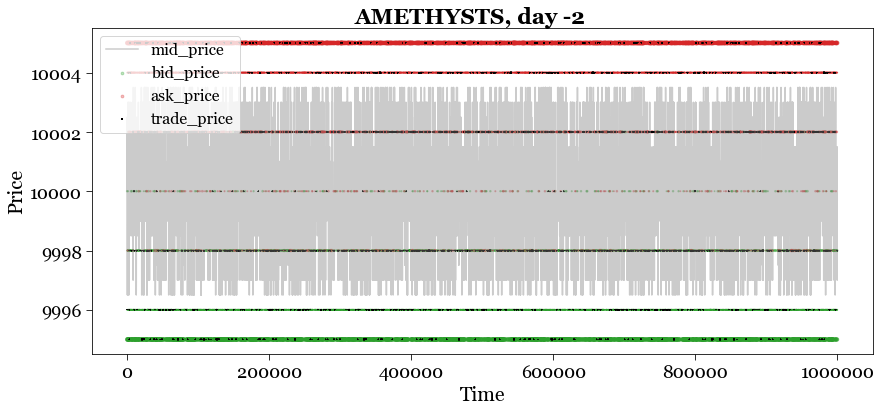

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


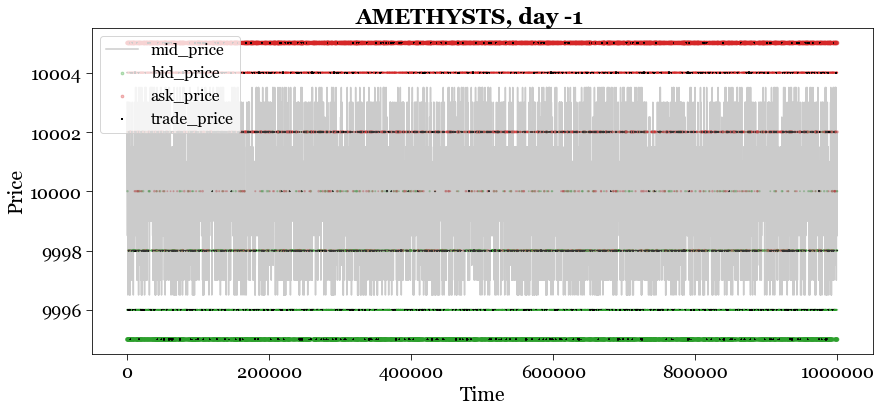

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


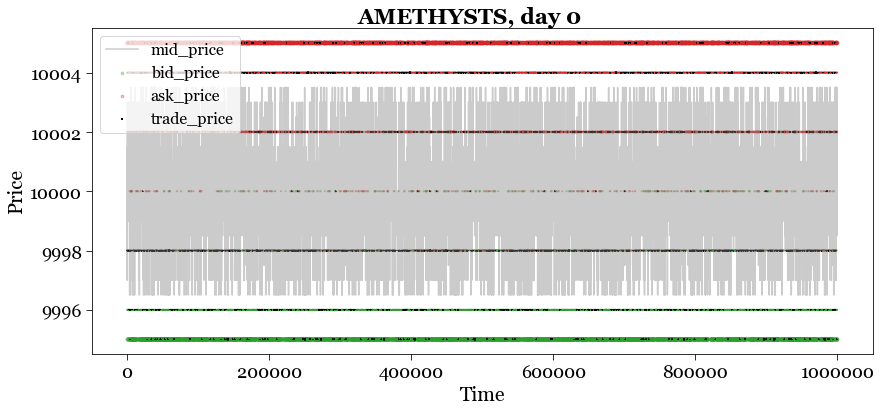

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


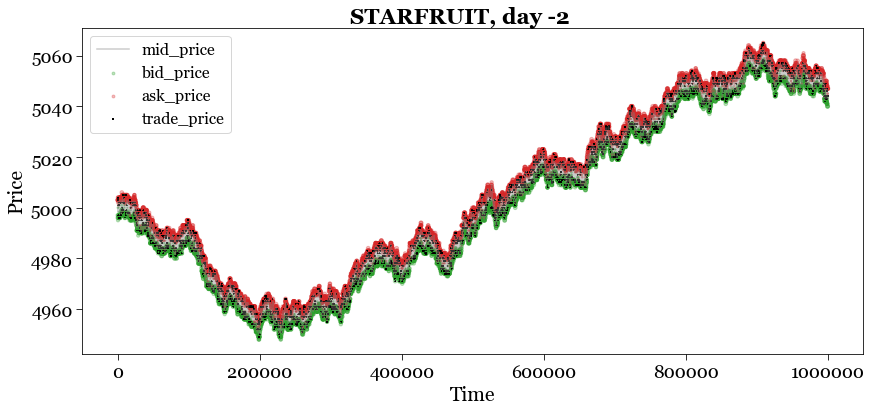

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


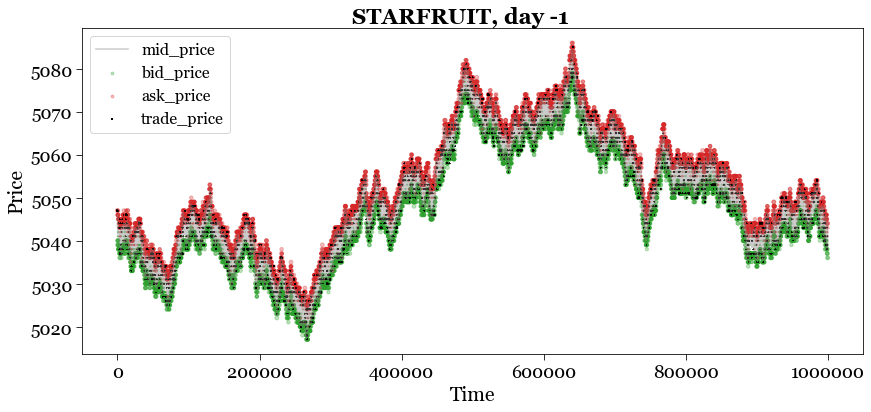

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/1038530601.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


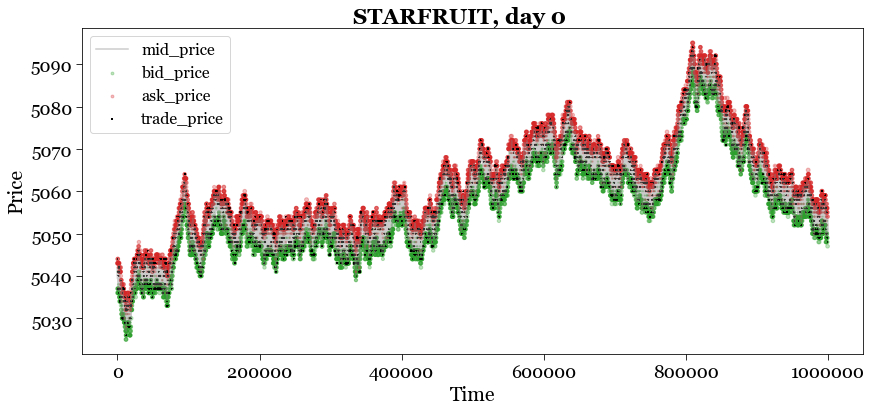

In [45]:
# Overlayed time series plot of prices
products = price['product'].unique()

for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        xs = filtered_price['timestamp']
        mids = filtered_price['mid_price']
        bids = filtered_price['bid_price_1']
        asks = filtered_price['ask_price_1']
        ax.plot(xs, mids, label='mid_price', 
                color=tableau_colors[7], alpha=0.4)
        ax.scatter(xs, bids, label='bid_price', alpha=0.3,
                   color=tableau_colors[2], marker='o', s=0.5*filtered_price['bid_volume_1'])
        ax.scatter(xs, asks, label='ask_price', alpha=0.3,
                   color=tableau_colors[3], marker='o', s=0.5*filtered_price['ask_volume_1'])
        ax.scatter(filtered_trade['timestamp'], filtered_trade['price'], label='trade_price', alpha=1,
                   color='black', marker='+', s=0.5*filtered_trade['quantity'])

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_prices.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_prices.pdf')
        plt.show()

A time series plot of trade that happpened with empty strategy
   * scatter of `price` sized by `quantity`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


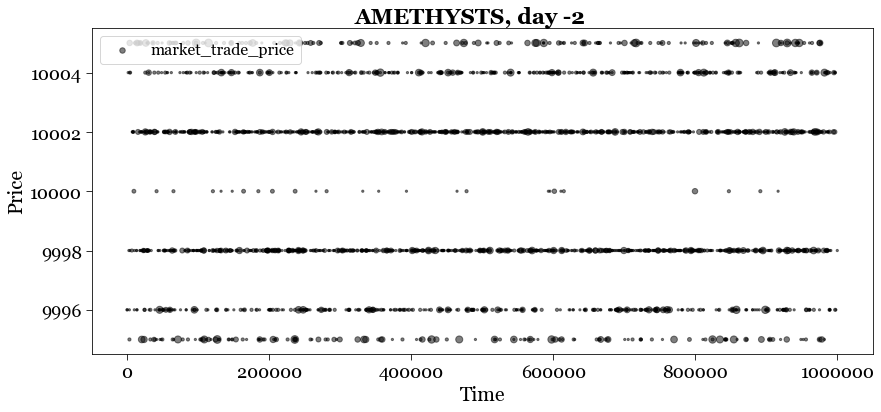

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


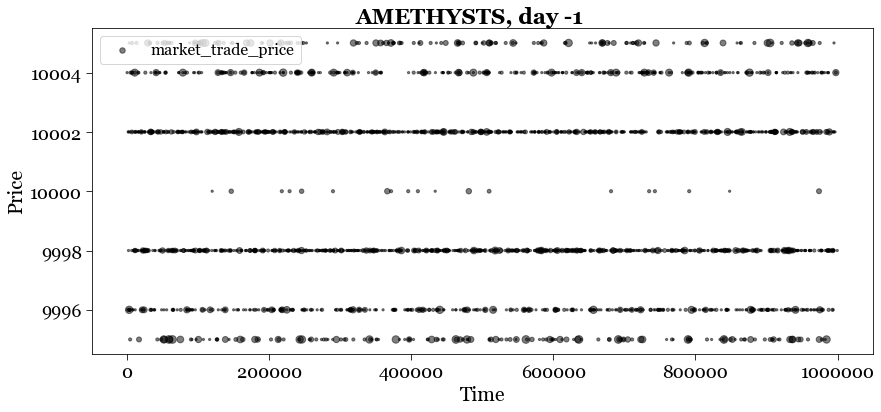

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


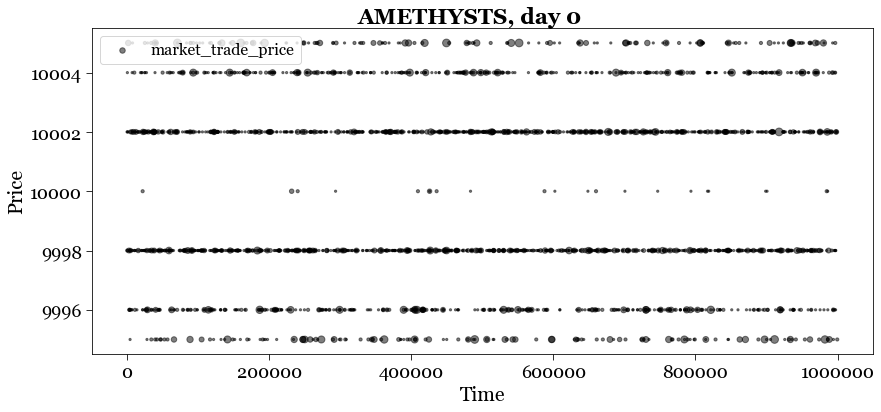

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


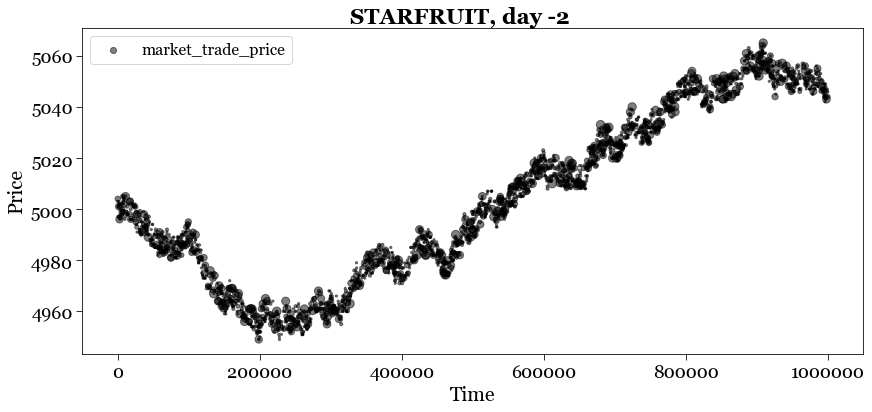

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


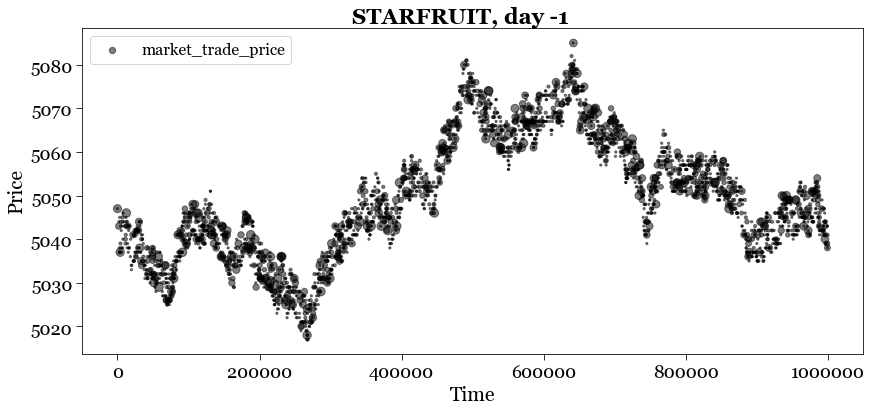

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/4028647079.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


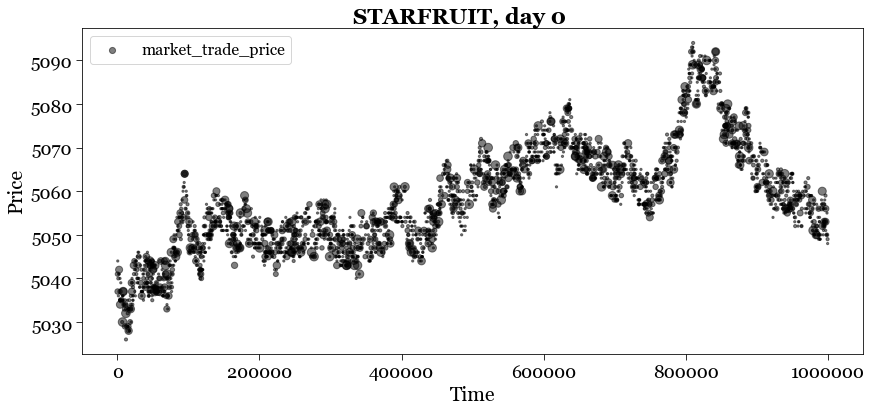

In [25]:
products = trade['symbol'].unique()

for product in products:
    for day in days:
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]

        ax.scatter(filtered_trade['timestamp'], filtered_trade['price'], label='market_trade_price', alpha=0.5,
                   color='black', marker='o', s=5*filtered_trade['quantity'])

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_market_trade_price.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_market_trade_price.pdf')
        plt.show()

A time series plot of moving average 
   * line of `mid_price`
   * line of moving average of `mid_price`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


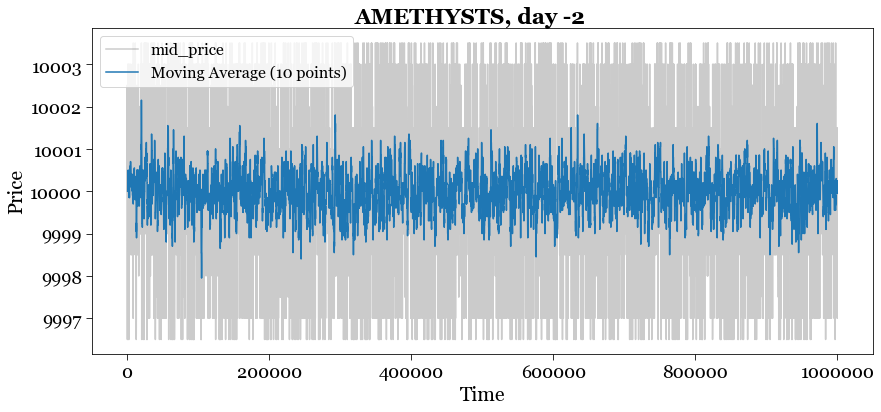

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


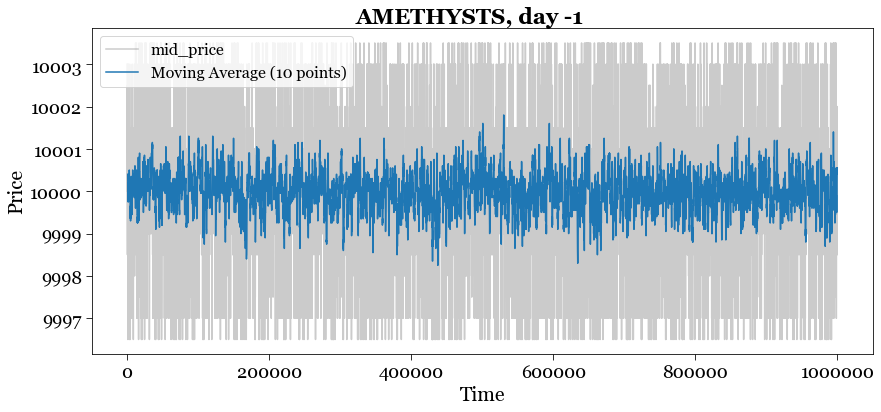

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


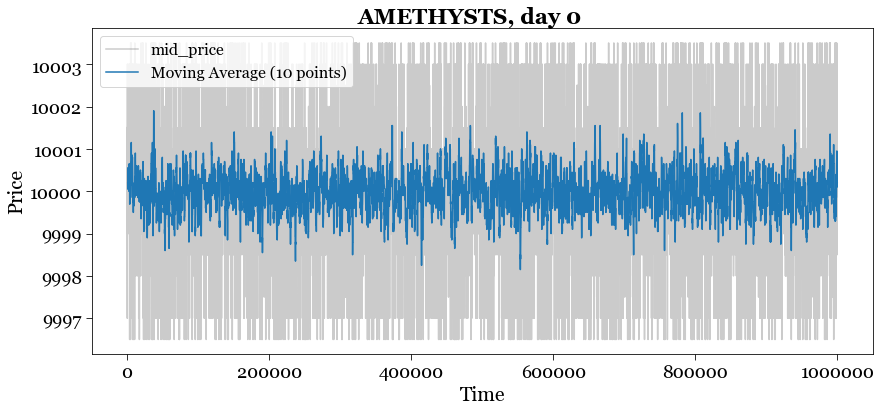

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


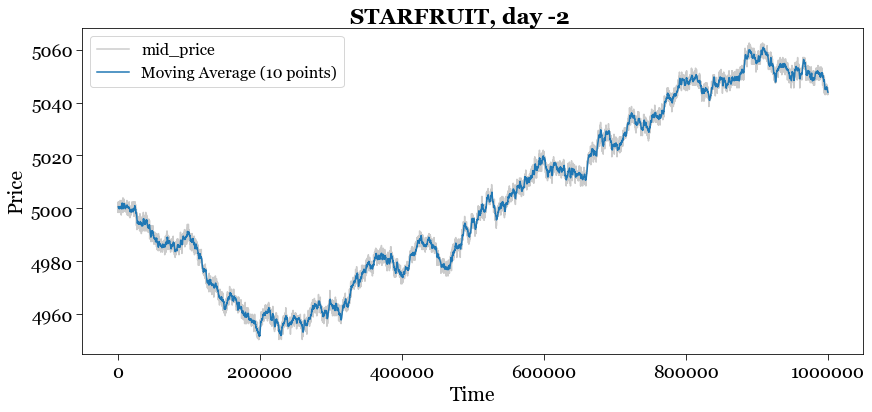

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


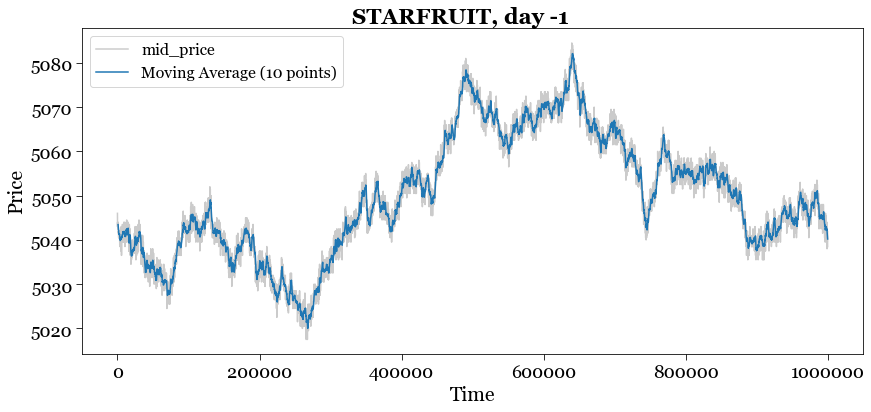

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/302037824.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


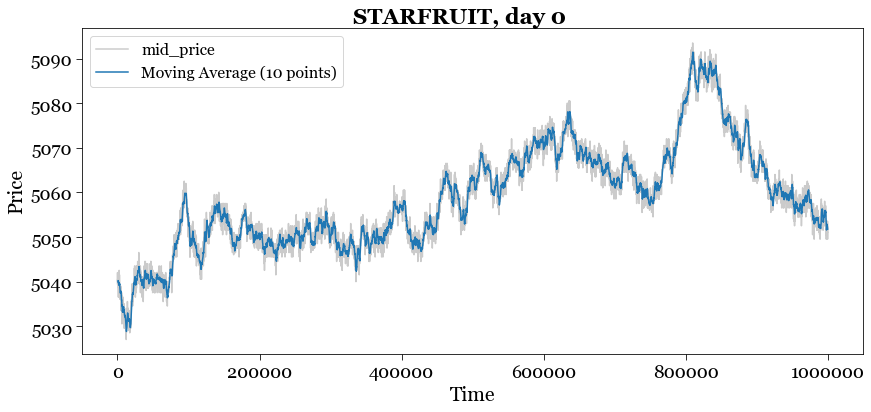

In [57]:
for product in products:
    for day in days:
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        xs = filtered_price['timestamp']
        mids = filtered_price['mid_price']

        # Calculate the moving average
        window_size = 10
        mas = mids.rolling(window=window_size).mean()

        ax.plot(xs, mids, label='mid_price', 
                color=tableau_colors[7], alpha=0.4)
        ax.plot(xs, mas, label=f'Moving Average ({window_size} points)',
                color=tableau_colors[0], alpha=1) 
                
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Time', fontdict=font)
        plt.ylabel('Price', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_moving_avg.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_moving_avg.pdf')
        plt.show()

### Statistical visualization: for `AMETHYSTS` - 
A histogram of trade price
   * histogram of `price`, scaled by `quantity`

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


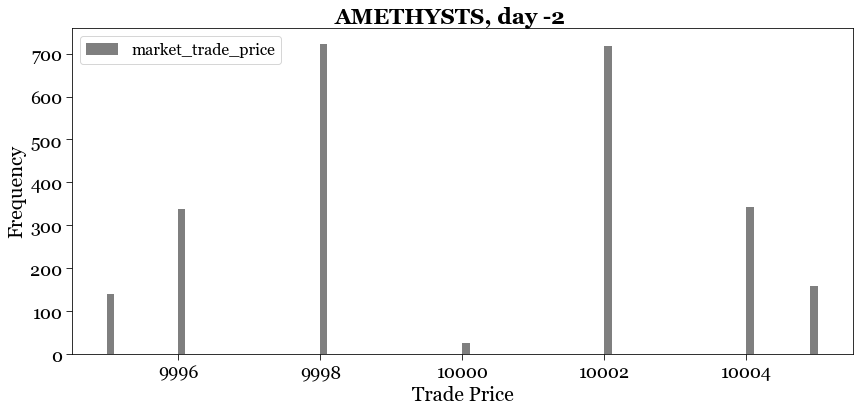

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


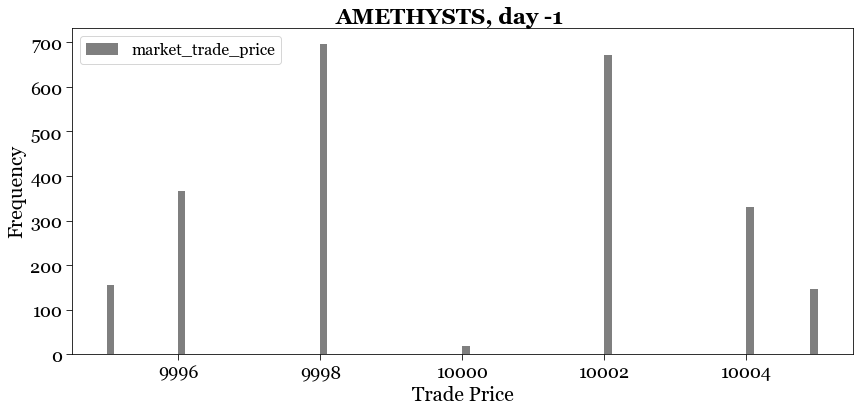

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


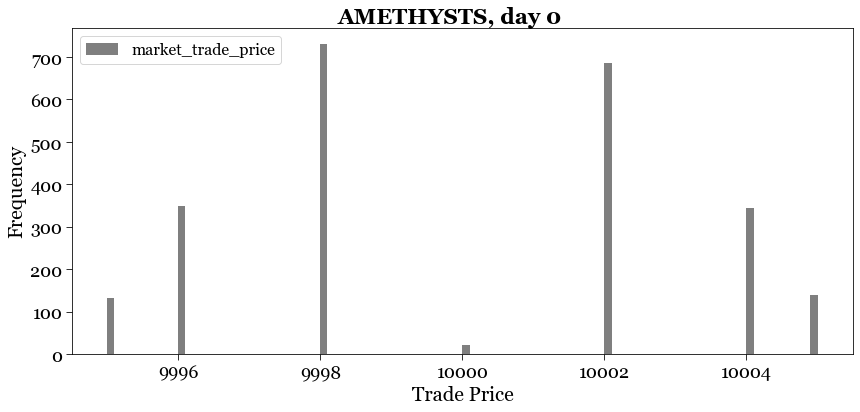

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


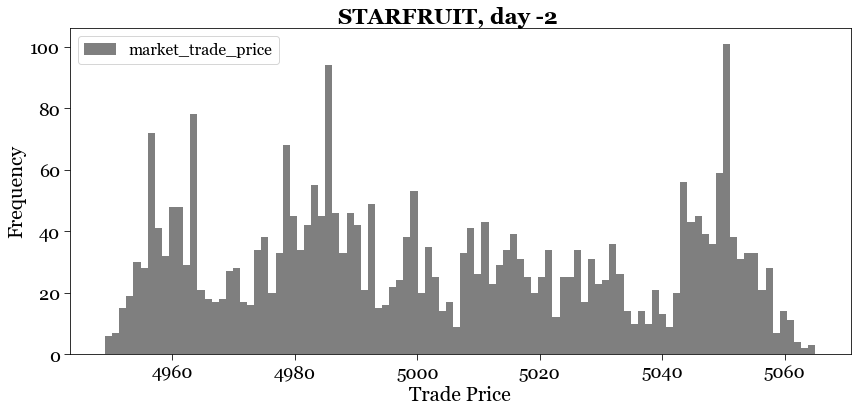

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


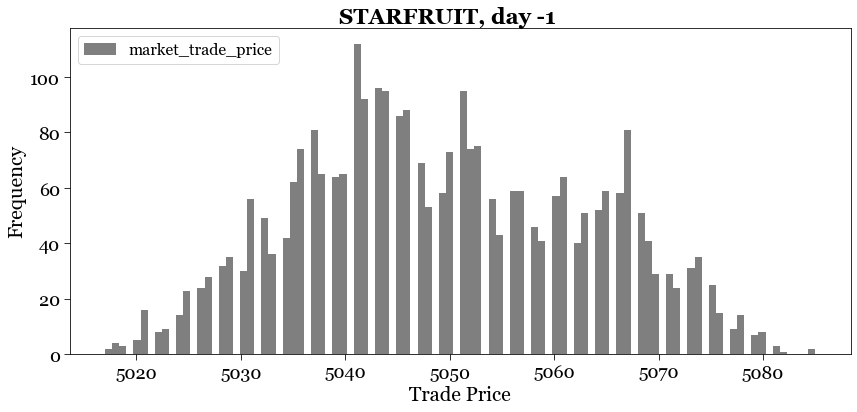

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/2355729983.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


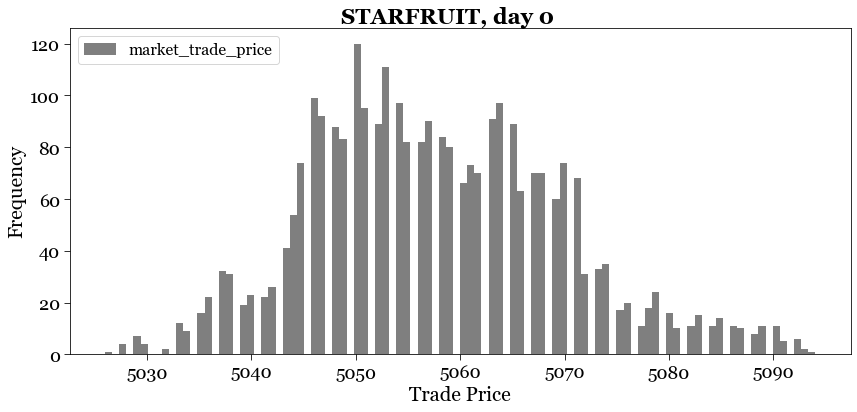

In [55]:
for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        ax.hist(filtered_trade['price'], bins=100, alpha=0.5, 
                color='black', label='market_trade_price')

        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Trade Price', fontdict=font)
        plt.ylabel('Frequency', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        # plt.savefig(f'./../plots/R1_{product}_day{day}_trade_histogram.png')
        # plt.savefig(f'./../plots/R1_{product}_day{day}_trade_histogram.pdf')
        plt.show()

Plots of individual bids and asks distribution
   * histogram of `bid_price_1`, scaled by 'bid_volume_1'
   * histogram of `ask_price_1`, scaled by 'ask_volume_1'

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


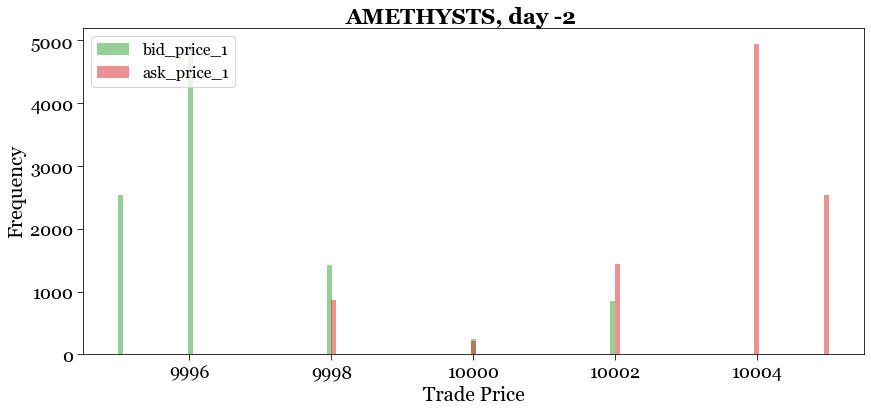

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


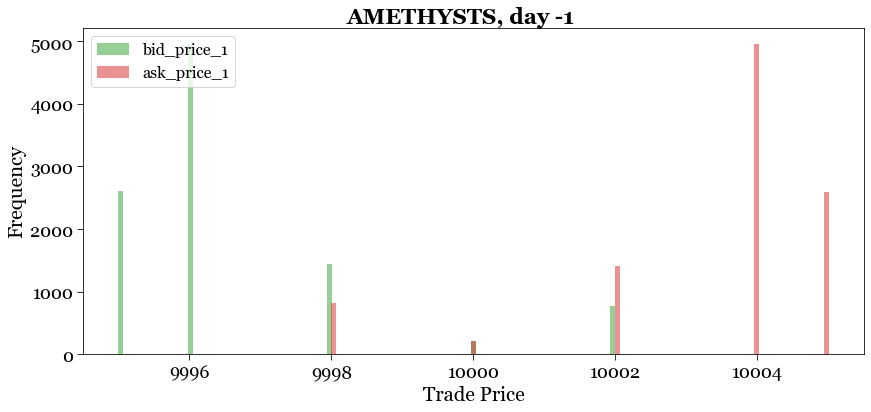

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


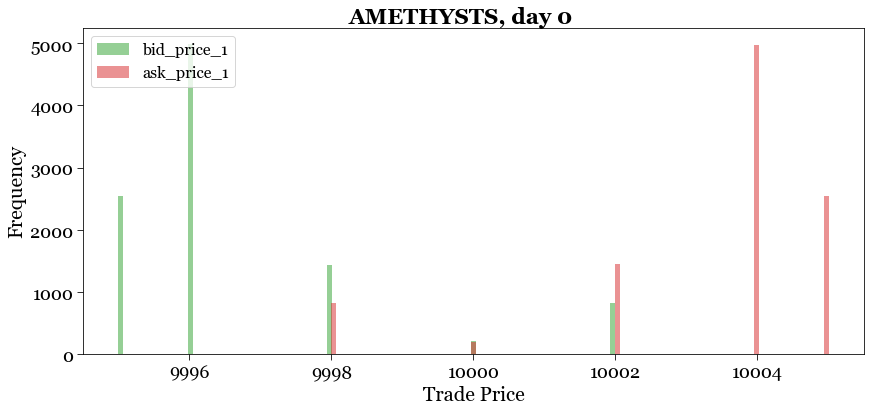

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


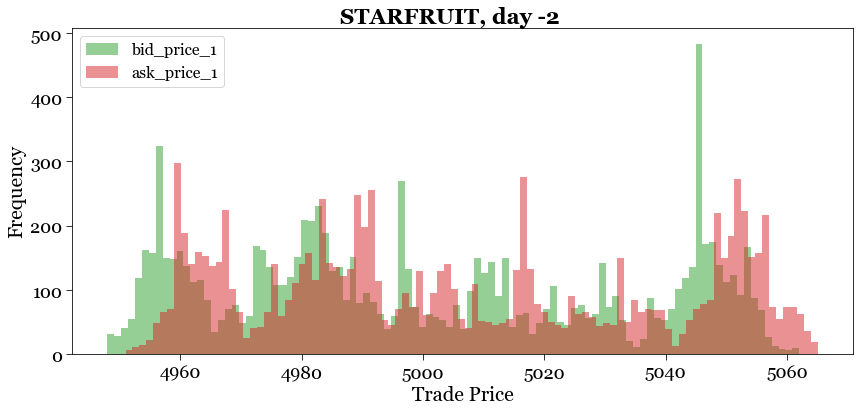

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


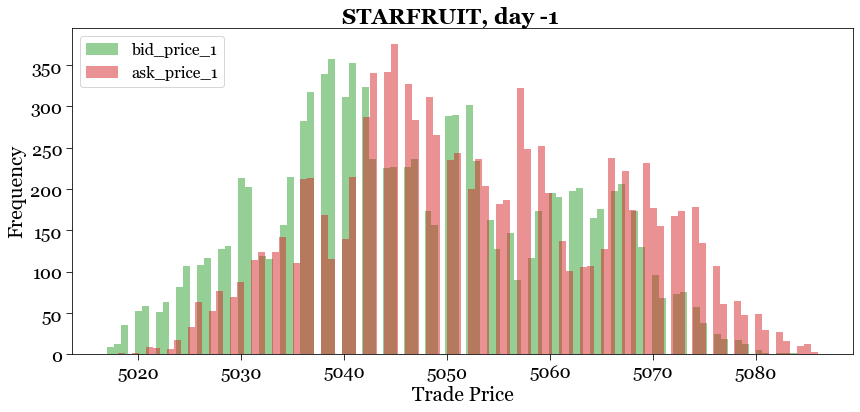

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_1781/3138752089.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)


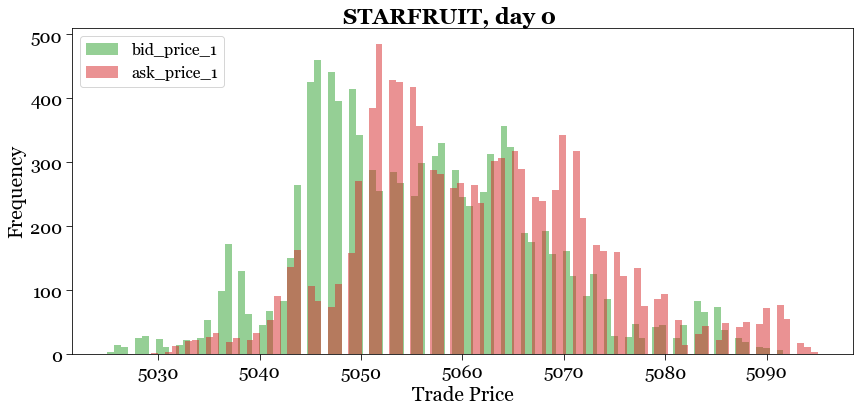

In [59]:
for product in products:
    for day in days:
        filtered_trade = trade[(trade['day'] == day) & (trade['symbol'] == product)]
        filtered_price = price[(price['day'] == day) & (price['product'] == product)]
        
        fig = plt.figure(figsize=(14, 6))
        ax = plt.gca()

        ax.hist(filtered_price['bid_price_1'], bins=100, alpha=0.5, 
                color=tableau_colors[2], label='bid_price_1')
        ax.hist(filtered_price['ask_price_1'], bins=100, alpha=0.5, 
                color=tableau_colors[3], label='ask_price_1')
        
        # Customize tick sizes
        ax.tick_params(axis='both', which='major', labelsize=18, length=6)  # Adjust label size and tick length
        # ax.set_xlim(0, 2000)
        # ax.set_ylim(0, 12000)
        ax.set_xticklabels(ax.get_xticks(), fontdict=tick_font)
        ax.set_yticklabels(ax.get_yticks(), fontdict=tick_font)
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

        # Customize the plot (optional)
        plt.xlabel('Trade Price', fontdict=font)
        plt.ylabel('Frequency', fontdict=font)
        plt.gcf().set_facecolor('white')
        fig.suptitle(f'{product}, day {day}', fontproperties=suptitle_font, y=0.93)
        plt.legend(loc='upper left', prop=legend_font)

        plt.savefig(f'./../plots/R1_{product}_day{day}_bid_ask_histogram.png')
        plt.savefig(f'./../plots/R1_{product}_day{day}_bid_ask_histogram.pdf')
        plt.show()

A histogram of bid-ask spread
   * histogram of `bid_price_1` - `ask_price_1`

An overlayed line plot of trade quantity at a price point
   * when `price` = 9995
   * when `price` = 9996
   * when `price` = 9998
   * when `price` = 10000
   * when `price` = 10002
   * when `price` = 10004
   * when `price` = 10005


### Data Analysis
* Perform Technical Analysis: Use technical analysis techniques to identify patterns, trends, and signals in the stock price data. Common technical indicators include moving averages, relative strength index (RSI), and Bollinger Bands. These indicators can help you identify entry and exit points for trades.
   - moving averages
   - relative strength index (RSI) 
   - Bollinger Bands
* Correlation study
* ARIMA modeling

#### Moving Average for STARFRUIT
* Plot moving average prediction of `mid_price` vs mid price
* Performance metric

### Performance Metrics